# Optimisation with Gradient Descent and Newton's Method

Task: Estimate the $x$ value where the polynomial function $f(x) = (x+0)^{4} + (x+1)^{3} + (x+2)^{2} + (x+3)^{1}$ is at a minimum with Newton's method and gradient descent.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define the function: f(x)

def f(x):
    return (x+0)**4 + (x+1)**3 + (x+2)**2 + (x+3)

In [3]:
# Find the 1st derivative of f(x)

x = sp.Symbol('x')

y = (x+0)**4 + (x+1)**3 + (x+2)**2 + (x+3)
sp.diff(y)

4*x**3 + 2*x + 3*(x + 1)**2 + 5

In [4]:
def df(x):
    return 4*x**3 + 2*x + 3*(x+1)**2 + 5

In [5]:
# Find the 2nd derivative of f(x)

sp.diff(sp.diff(y))

12*x**2 + 6*x + 8

In [6]:
def d2f(x):
    return 12*x**2 + 6*x + 8

In [7]:
# Implement the gradient descent algorithm

def GradientDescent(x0, df, gamma, tol):
    x_list = [x0]
    dy_list = [df(x0)]
    x1 = None
    while True:
        try:
            x1 = x0 - gamma*df(x0)
            x_list.append(x1)
            dy_list.append(df(x1))
            if np.abs(df(x1)-df(x0))<=tol:
                break
        except OverflowError as err:
            print('Gradient descent failed to converge.')
            print(f'OverflowError at x[{len(x_list)}] = {x1}', err, '\n')
            break
        x0 = x1
    return x_list, dy_list, x1

In [8]:
# Implement Newton's method

def NewtonRaphson(x0, df, d2f, tol):
    x_list = [x0]
    dy_list = [df(x0)]
    d2y_list = [d2f(x0)]
    x1 = None
    while True:
        x1 = x0 - df(x0)/d2f(x0)
        x_list.append(x1)
        dy_list.append(df(x1))
        d2y_list.append(d2f(x1))
        if np.abs(df(x1)-df(x0))<=tol:
            break
        x0 = x1
    return x_list, dy_list, d2y_list, x1

In [9]:
# Generate data for plotting

x = np.linspace(-10,10,10000)
y = f(x)
dy = df(x)
d2y = d2f(x)

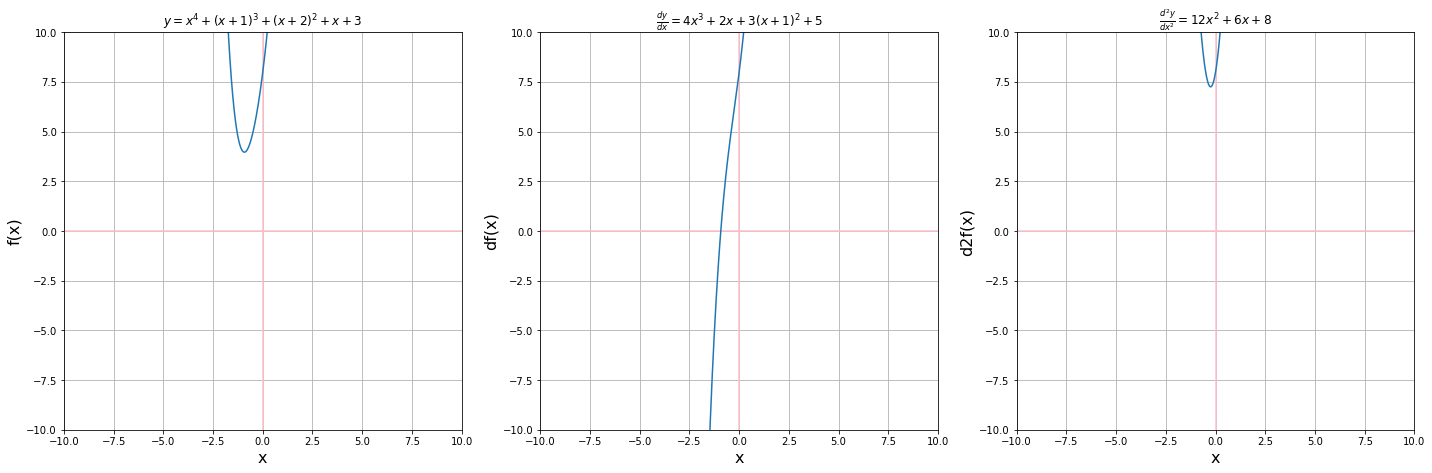

In [10]:
func_dict = {
    0:[y,'f(x)','$y = x^4 + (x+1)^3 + (x+2)^2 + x + 3$'],
    1:[dy,'df(x)','$\\frac{dy}{dx} = 4x^3 + 2x + 3(x+1)^2 + 5$'],
    2:[d2y,'d2f(x)','$\\frac{d^2y}{dx^2} = 12x^2 + 6x + 8$'],
}

fig, axs = plt.subplots(1, 3)

for k in range(3):
    axs[k].axhline(0, color='pink')
    axs[k].axvline(0, color='pink')
    axs[k].plot(x,func_dict[k][0])
    axs[k].set_ylabel(func_dict[k][1], fontsize=16)
    axs[k].set_xlabel('x', fontsize=16)
    axs[k].set_xlim(-10,10)
    axs[k].set_ylim(-10,10)
    axs[k].grid()
    axs[k].set_aspect('equal', 'box')
    axs[k].set_title(func_dict[k][2])

fig.set_size_inches(20,20)
fig.tight_layout()
plt.show()

In [11]:
# Run the gradient descent algorithm. The x value should converge to a minimum after several iterations.

x_list, dy_list, x1 = GradientDescent(3,df,0.03,0.001)
y_list = [f(x) for x in x_list]
d2y_list = [d2f(x) for x in x_list]

for k in range(len(x_list)):
    print(f'x[{k}] = {x_list[k]}; f(x[{k}]) = {y_list[k]}; df(x[{k}]) = {dy_list[k]}; d2f(x[{k}]) = {d2y_list[k]}')

x[0] = 3; f(x[0]) = 176; df(x[0]) = 167; d2f(x[0]) = 134
x[1] = -2.01; f(x[1]) = 16.282207009999993; df(x[1]) = -28.442103999999986; d2f(x[1]) = 44.421199999999985
x[2] = -1.1567368800000002; f(x[2]) = 4.340856943274976; df(x[2]) = -3.4308162405911293; d2f(x[2]) = 17.11606123462562
x[3] = -1.0538123927822662; f(x[3]) = 4.074558679127629; df(x[3]) = -1.7800587755334387; d2f(x[3]) = 15.003372353484226
x[4] = -1.0004106295162631; f(x[4]) = 4.000411810040205; df(x[4]) = -1.0057503310540366; d2f(x[4]) = 14.007393354691931
x[5] = -0.970238119584642; f(x[5]) = 3.976360204353189; df(x[5]) = -0.5912001512508942; d2f(x[5]) = 13.474915386833853
x[6] = -0.9525021150471152; f(x[6]) = 3.9679780756512892; df(x[6]) = -0.35490542209694187; d2f(x[6]) = 13.172110659748043
x[7] = -0.941854952384207; f(x[7]) = 3.964942569990354; df(x[7]) = -0.21561063450171059; d2f(x[7]) = 12.99395930166264
x[8] = -0.9353866333491557; f(x[8]) = 3.963819012539128; df(x[8]) = -0.13190783718120436; d2f(x[8]) = 12.887058046084

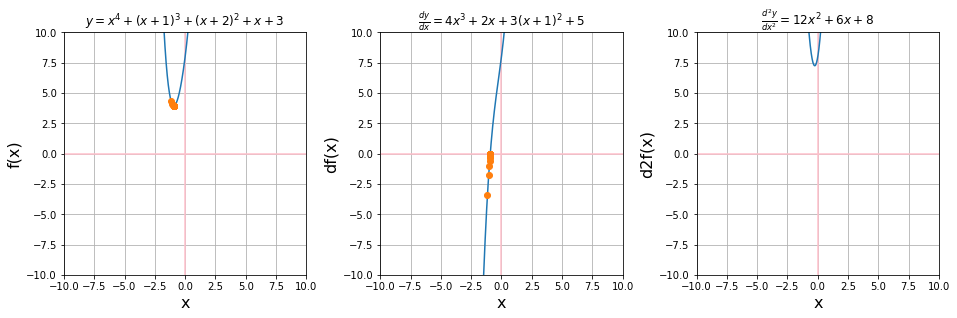

In [12]:
func_dict = {
    0:[y,y_list,'f(x)','$y = x^4 + (x+1)^3 + (x+2)^2 + x + 3$'],
    1:[dy,dy_list,'df(x)','$\\frac{dy}{dx} = 4x^3 + 2x + 3(x+1)^2 + 5$'],
    2:[d2y,d2y_list,'d2f(x)','$\\frac{d^2y}{dx^2} = 12x^2 + 6x + 8$'],
}

fig, axs = plt.subplots(1, 3)

for k in range(3):
    axs[k].axhline(0, color='pink')
    axs[k].axvline(0, color='pink')
    axs[k].plot(x,func_dict[k][0])
    axs[k].plot(x_list,func_dict[k][1],linestyle = "",marker='o')
    axs[k].set_ylabel(func_dict[k][2], fontsize=16)
    axs[k].set_xlabel('x', fontsize=16)
    axs[k].set_xlim(-10,10)
    axs[k].set_ylim(-10,10)
    axs[k].grid()
    axs[k].set_aspect('equal', 'box')
    axs[k].set_title(func_dict[k][3])

fig.set_size_inches(13.33,13.33)
fig.tight_layout()
plt.show()

In [13]:
# Run Newton's method. The x value should converge to a minimum after several iterations.
# It takes fewer iterations for Newton's method to converge than gradient descent.
# The final estimate of x = -0.925... is similar across both Newton's method and gradient descent.

x_list, dy_list, d2y_list, x1 = NewtonRaphson(3,df,d2f,0.001)
y_list = [f(x) for x in x_list]

for k in range(len(x_list)):
    print(f'x[{k}] = {x_list[k]}; f(x[{k}]) = {y_list[k]}; df(x[{k}]) = {dy_list[k]}; d2f(x[{k}]) = {d2y_list[k]}')

x[0] = 3; f(x[0]) = 176; df(x[0]) = 167; d2f(x[0]) = 134
x[1] = 1.7537313432835822; f(x[1]) = 49.18502822684158; df(x[1]) = 52.831491074367534; d2f(x[1]) = 55.42927155268434
x[2] = 0.8005979248847435; f(x[2]) = 17.892586346125995; df(x[2]) = 18.380250007173125; d2f(x[2]) = 20.495071997265548
x[3] = -0.09621522169143926; f(x[3]) = 7.26650270108813; df(x[3]) = 7.2544875339256345; d2f(x[3]) = 7.533797096472958
x[4] = -1.0591410134308947; f(x[4]) = 4.0842574287171045; df(x[4]) = -1.860280543761906; d2f(x[4]) = 15.106510155391703
x[5] = -0.9359967183801977; f(x[5]) = 3.9639018864643805; df(x[5]) = -0.13977310053925418; d2f(x[5]) = 12.897097971540804
x[6] = -0.9251591562520598; f(x[6]) = 3.9631410076040363; df(x[6]) = -0.0009617748304675544; d2f(x[6]) = 12.72007863525192
x[7] = -0.9250835454906764; f(x[7]) = 3.9631409712426056; df(x[7]) = -4.631678685029783e-08; d2f(x[7]) = 12.718853520707146


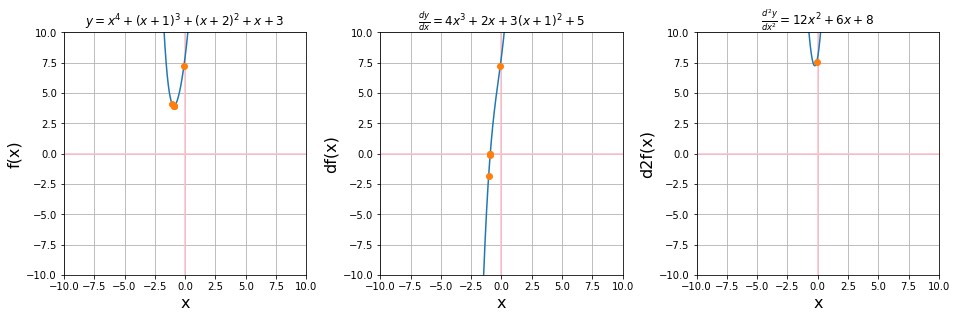

In [14]:
func_dict = {
    0:[y,y_list,'f(x)','$y = x^4 + (x+1)^3 + (x+2)^2 + x + 3$'],
    1:[dy,dy_list,'df(x)','$\\frac{dy}{dx} = 4x^3 + 2x + 3(x+1)^2 + 5$'],
    2:[d2y,d2y_list,'d2f(x)','$\\frac{d^2y}{dx^2} = 12x^2 + 6x + 8$'],
}

fig, axs = plt.subplots(1, 3)

for k in range(3):
    axs[k].axhline(0, color='pink')
    axs[k].axvline(0, color='pink')
    axs[k].plot(x,func_dict[k][0])
    axs[k].plot(x_list,func_dict[k][1],linestyle = "",marker='o')
    axs[k].set_ylabel(func_dict[k][2], fontsize=16)
    axs[k].set_xlabel('x', fontsize=16)
    axs[k].set_xlim(-10,10)
    axs[k].set_ylim(-10,10)
    axs[k].grid()
    axs[k].set_aspect('equal', 'box')
    axs[k].set_title(func_dict[k][3])

fig.set_size_inches(13.33,13.33)
fig.tight_layout()
plt.show()

In [15]:
# These are the complex roots of the derivative of f(x).
# The real estimate of the root of the derivative of f(x) is x = -0.925...
# The real estimate is very close, almost identical to the true value.
# The derivative also has 2 other complex roots: 0.088-1.468i and 0.088+1.468i

x = sp.Symbol('x')

dy = 4*x**3 + 2*x + 3*(x+1)**2 + 5

for x in sp.solve(dy):
    print(x.evalf())

0.0875417709245457 + 1.46775452353472*I
0.0875417709245457 - 1.46775452353472*I
-0.925083541849091


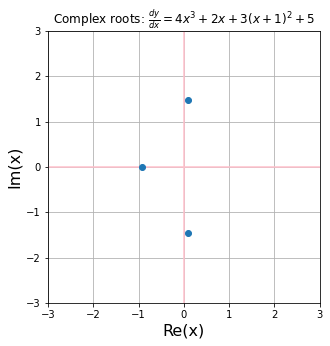

In [16]:
plt.figure(figsize=(5,5))
plt.axhline(0, color='pink')
plt.axvline(0, color='pink')
plt.plot([0.0875417709245457,0.0875417709245457,-0.925083541849091],[1.46775452353472,-1.46775452353472,0],linestyle = "",marker='o')
plt.gca().set_aspect('equal')
plt.ylabel('Im(x)', fontsize=16)
plt.xlabel('Re(x)', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.title('Complex roots: $\\frac{dy}{dx} = 4x^3 + 2x + 3(x+1)^2 + 5$')
plt.show()

In [17]:
# Is it possible to find complex roots by numerical methods?
# If yes, how?

### Author
H.N. 15/10/23